## Géométrie de caméra
Une caméra est un dispositif qui transforme l’environnement 3D, appelé espace monde, qu’elle observe en une image 2D, appelée espace image. On peut modéliser cette transformation par une projection centrale de l’espace 3D sur un plan.

![machin](perspective.png "projection")

Admettons que le centre de projection, appelé centre optique, est à l’origine des axes et que le plan $z = f$, que nous appellerons plan focal, soit le plan de projection. Le point $\vec{X} = (x, y, z)^T$ de l’espace monde est projeté sur le point d’intersection du plan focal et de la droite passant par $\vec{X}$ et le centre de projection. Le point, résultat de la projection du point $\vec{X}$, est appelé point image et noté $\vec{x}$, le point projeté $\vec{X}$ est appelé point monde. On trouve facilement que $\vec{x} = (\frac{fx}{z}, \frac{fy}{z}, f)^T$. Abandonnons la troisième composante : 

$$\left(\begin{array}{c} x \\ y \\ z \end{array}\right) \rightarrow \left(\begin{array}{c} fx/z \\ fy/z \end{array}\right)$$

La droite perpendiculaire au plan focal et passant par le centre optique est appelée axe principal et le point d’intersection de l’axe principal avec le plan focal est appelé point principal. Le plan parallèle au plan focal et passant par le centre optique est appelé plan principal.

### Coordonnées homogènes
Une projection centrale comme celle-ci paut facilement se représenter sous forme de multiplication de matrice pour autant que l'on travaille en coordonnées homogènes. En coordonnées homogènes, chaque point 3D est représenté par un quadruplet $(X, Y, Z, T)^T$. On peut retrouver les coordonnées cartesiènes classique en divisant par la dernière composante:

$$\begin{pmatrix}X \\ Y \\ Z \\ T\end{pmatrix} \rightarrow \begin{pmatrix}X/T \\ Y/T \\ Z/T\end{pmatrix}$$ 

On constate, dès lors, que les coordonnées homogènes sont définies à un facteur près:

$$\begin{pmatrix}X \\ Y \\ Z \\ T\end{pmatrix} \Leftrightarrow \begin{pmatrix}kX \\ kY \\ kZ \\ kT\end{pmatrix}$$

### Matrice de projection
En coordonnées homogènes, la projection centrale décrite plus haut peut s'écrire sous forme de multiplication matricielle:

$$\begin{equation}\label{homogene}
\left(\begin{array}{c} x \\ y \\ z \\ 1 \end{array}\right) \rightarrow \left(\begin{array}{c} fx \\ fy \\ z \end{array}\right) = \left(\begin{array}{cccc} f & & & 0 \\ & f & & 0 \\ & & 1 & 0 \end{array}\right) \left(\begin{array}{c} x \\ y \\ z \\ 1 \end{array}\right)
\end{equation}$$

La forme de la matrice de projection est particulièrement simple car nous avons choisi nos axes favorablement. Dans un cas plus général, les coordonnées monde ne sont pas alignées sur les axes de la caméra et la matrice de projection peut se calculer comme suit:

$$\left(\begin{array}{cccc} f & & & 0 \\ & f & & 0 \\ & & 1 & 0 \end{array}\right)\left(\begin{array}{cc} R & -RC \\ 0 & 1 \end{array}\right)$$

Où $R$ est la matrice $3\times3$ de rotation qui représente l'orientation du référentiel caméra par rapport au référentiel monde, et $C$ est la matrice colonne de coordonnées du centre optique de la caméra dans le référentiel monde.

Enfin pour tenir compte du fait que les coordonnées dans une image sont en générale donnée en pixel avec l'origine dans le coin supérieur gauche et avec l'axe $y$ dirigé vers le bas, on utilisera la forme suivante:

$$\left(\begin{array}{cccc} mf & & p_x & 0 \\ & -mf & p_y & 0 \\ & & 1 & 0 \end{array}\right)\left(\begin{array}{cc} R & -RC \\ 0 & 1 \end{array}\right)$$

Où $(p_x, p_y)$ sont les coordonnées en pixel du centre de l'image et $m$ est le nombre de pixel par unité de longueur. Les paramètres de la matrice de gauche sont appelés paramètres intrinsèques de la caméra. Il ne dépendent pas de la position de la caméra. Les paramètres de la matrice de droite sont appelés paramètres extrinsèques de la caméra. Ils dépendent de la position de la caméra.

### Exercice 1
On vous demande, à partir des coordonnées 3D des sommets d'un cube:

In [1]:
x = [1, -1, -1,  1, 1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1]
y = [1,  1, -1, -1, 1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1]
z = [1,  1,  1,  1, 1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1]
# Certains sommets apparaissent plusieurs fois pour facilité l'affichage avec plot()

De définir une matrice de projection pour obtenir l'image projetée d'un cube:

![machin](cube.png "cube")

Pour cela, vous devez utiliser le language python dans un environnement **Jupyter** avec les librairies `numpy` et `matplotlib`.

Pour créer une matrice avec `numpy` vous devez utiliser des listes à deux dimensions et la fonction `np.array()`:

$$M = \begin{pmatrix}1 & 2 & 3 \\ 4 & 5 & 6\end{pmatrix}$$

In [2]:
import numpy as np

M = np.array([[1, 2, 3], [4, 5, 6]])

Vous pouvez donc facilement créer une matrice contenant toute les coordonnées de vos sommets:

In [3]:
Xcube = np.array([x, y, z, [1]*16])
print(Xcube)

[[ 1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1]
 [ 1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]]


La mutliplication entre deux matrices se fait avec l'opérateur `@`:

$$\begin{pmatrix}1 & 2 & 3 \\ 4 & 5 & 6\end{pmatrix} \begin{pmatrix}1 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix}1 \\ 4\end{pmatrix}$$

In [4]:
N = np.array([[1], [0], [0]])

print(M @ N)

[[1]
 [4]]


L'affichage se fait avec la fonction `plt.plot()` qui prend une liste d'abcisses et une liste d'ordonnées.

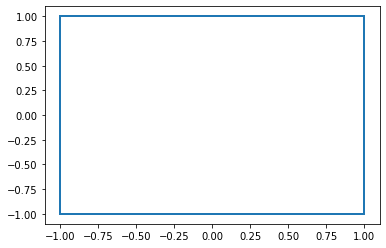

In [5]:
from matplotlib import pyplot as plt

# numpy supporte les notations indicielles de matlab
# ici on récupère les coordonnées classiques à partir
# des coordonnées homogènes en divisant par la quatrième composante
xi = Xcube[0, :]/Xcube[3, :]  
yi = Xcube[1, :]/Xcube[3, :]

plt.plot(xi, yi)
plt.show()

`plt.plot()` utilisé seul définit automatiquement la taille et les axes du graphique. Pour afficher une image de $640 \times 480$ avec l'axe $y$ vers le bas, vous pouvez faire comme suit:

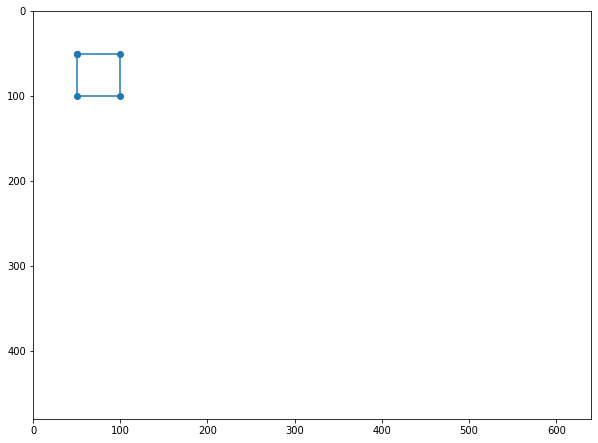

In [6]:
factor = 2.5
plt.figure(figsize=(4*factor, 3*factor))  # taille de l'image en pouces
plt.axis([0, 640, 480, 0])
plt.plot([50, 50, 100, 100, 50], [50, 100, 100, 50, 50], "-o")  # "-o" pour traits et cercle
plt.show()

## Calibration de caméra
La calibration de caméra consiste à trouver la matrice de projection d'une caméra en partant de points dans une image dont on connait les coordonnées dans l'espace monde.

Nous allons ici réaliser une calibration dans un cas simplifié. Les coordonnées mondes seront en 2D. C'est un cas très utile en pratique lorsqu'on s'intéresse à des objets qui évoluent sur un plan.

Lorsque les coordonnées sont en 2D, la matrice de projection devient une matrice $3 \times 3$ et comme cette matrice est définie à un facteur près, il n'y a que 8 paramètres indépendants. Cela revient à dire que l'on peut fixer une des composante de la matrice. On fixe en général le coin inférieur droit à 1.

$$\begin{pmatrix} sx_i \\ sy_i \\ s \end{pmatrix} = \begin{pmatrix}m_{11} & m_{12} & m_{13} \\ m_{21} & m_{22} & m_{23} \\ m_{31} & m_{32} & 1 \end{pmatrix}\begin{pmatrix} x_w \\ y_w \\ 1 \end{pmatrix}$$

Les coordonnées images sont elles aussi définies à un facteur près $s$.

Lorsqu'on connait les coordonnées d'un point dans l'image et dans le monde, on peut écrire les équations suivantes

$$
\begin{array}{ll}
& \begin{cases}
sx_i & = m_{11}x_w + m_{12}y_w + m_{13} \\
sy_i & = m_{21}x_w + m_{22}y_w + m_{23} \\
s & = m_{31}x_w + m_{32}y_w + 1
\end{cases} \\
\Leftrightarrow & \begin{cases}
0 & = (m_{11} - m_{31}x_i)x_w + (m_{12} - m_{32}x_i)y_w + (m_{13}-x_i) \\
0 & = (m_{21} - m_{31}y_i)x_w + (m_{22} - m_{32}y_i)y_w + (m_{23}-y_i)
\end{cases} \\
\Leftrightarrow & \begin{cases}
x_i &= &x_wm_{11} &+ y_wm_{12} &+ m_{13} &+ 0m_{21} &+ 0m_{22} &+ 0m_{23} &- x_ix_wm_{31} &- x_iy_wm_{32} \\
y_i &= &0m_{11} &+ 0m_{12} &+ 0m_{13} &+ x_wm_{21} &+ y_wm_{22} &+ m_{23} &- y_ix_wm_{31} &- y_iy_wm_{32}
\end{cases} \\
\Leftrightarrow & \begin{pmatrix}x_i \\ y_i\end{pmatrix}=\begin{pmatrix}x_w & y_w & 1 & & & & -x_ix_w & -x_iy_w \\ & & & x_w & y_w & 1 & -y_ix_w & -y_iy_w \end{pmatrix}\begin{pmatrix}m_{11} \\ m_{12} \\ m_{13} \\ m_{21} \\ m_{22} \\ m_{23} \\ m_{31} \\ m_{32} \end{pmatrix}
\end{array}
$$

Nous avons donc 2 équations par point. Comme nous avons 8 inconnues pour connaitre la matrice de projection, il nous faut 4 points:

$$\begin{pmatrix}x_{1i} \\ y_{1i} \\ x_{2i} \\ y_{2i} \\ x_{3i} \\ y_{3i} \\ x_{4i} \\ y_{4i} \end{pmatrix}=\begin{pmatrix}x_{1w} & y_{1w} & 1 & & & & -x_{1i}x_{1w} & -x_{1i}y_{1w} \\ & & & x_{1w} & y_{1w} & 1 & -y_{1i}x_{1w} & -y_{1i}y_{1w} \\ x_{2w} & y_{2w} & 1 & & & & -x_{2i}x_{2w} & -x_{2i}y_{2w} \\ & & & x_{2w} & y_{2w} & 1 & -y_{2i}x_{2w} & -y_{2i}y_{2w} \\ x_{3w} & y_{3w} & 1 & & & & -x_{3i}x_{3w} & -x_{3i}y_{3w} \\ & & & x_{3w} & y_{3w} & 1 & -y_{3i}x_{3w} & -y_{3i}y_{3w} \\ x_{4w} & y_{4w} & 1 & & & & -x_{4i}x_{4w} & -x_{4i}y_{4w} \\ & & & x_{4w} & y_{4w} & 1 & -y_{4i}x_{4w} & -y_{4i}y_{4w} \end{pmatrix}\begin{pmatrix}m_{11} \\ m_{12} \\ m_{13} \\ m_{21} \\ m_{22} \\ m_{23} \\ m_{31} \\ m_{32} \end{pmatrix}$$

$$\begin{pmatrix}m_{11} \\ m_{12} \\ m_{13} \\ m_{21} \\ m_{22} \\ m_{23} \\ m_{31} \\ m_{32} \end{pmatrix}=\begin{pmatrix}x_{1w} & y_{1w} & 1 & & & & -x_{1i}x_{1w} & -x_{1i}y_{1w} \\ & & & x_{1w} & y_{1w} & 1 & -y_{1i}x_{1w} & -y_{1i}y_{1w} \\ x_{2w} & y_{2w} & 1 & & & & -x_{2i}x_{2w} & -x_{2i}y_{2w} \\ & & & x_{2w} & y_{2w} & 1 & -y_{2i}x_{2w} & -y_{2i}y_{2w} \\ x_{3w} & y_{3w} & 1 & & & & -x_{3i}x_{3w} & -x_{3i}y_{3w} \\ & & & x_{3w} & y_{3w} & 1 & -y_{3i}x_{3w} & -y_{3i}y_{3w} \\ x_{4w} & y_{4w} & 1 & & & & -x_{4i}x_{4w} & -x_{4i}y_{4w} \\ & & & x_{4w} & y_{4w} & 1 & -y_{4i}x_{4w} & -y_{4i}y_{4w} \end{pmatrix}^{-1}\begin{pmatrix}x_{1i} \\ y_{1i} \\ x_{2i} \\ y_{2i} \\ x_{3i} \\ y_{3i} \\ x_{4i} \\ y_{4i} \end{pmatrix}$$

### Exercice 2
A partir d'une photo d'un document prise en oblique:

![machin](Couverture.jpg "couverture")

Vous devrez calibrer votre caméra et produire une version remise à plat du document:

![machin](plat.png "à plat")

Les 4 points connus sont les 4 coins du document. Vous pourrez les sélectionner à la souris et récupérer leurs coordonnées en utilisant le code suivant:

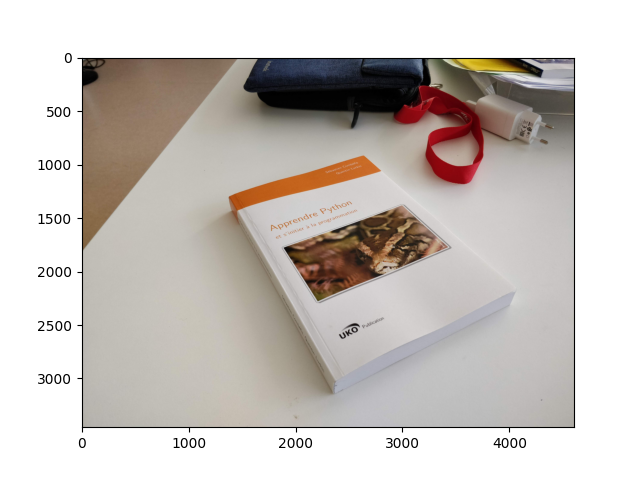

In [7]:
# import pour charger l'image
import matplotlib.image as mpimg

# pour rendre matplotlib interactif dans Jupyter et utiliser la souris
# %matplotlib widget

# Chargement de l'image
img = mpimg.imread('Couverture.jpg')

fig = plt.figure()
points = [[], []]

# fonction appelée à chaque click sur l'image
def onclick(event):
    # sauve le point
    points[0].append(event.xdata)
    points[1].append(event.ydata)
    # affiche une croix
    plt.plot([event.xdata], [event.ydata], "x")

# enregistrement de la fonction comme évenement
fig.canvas.mpl_connect('button_press_event', onclick)

# affichage de l'image
plt.imshow(img)
plt.show()

![machin](corners.png "les coins")

Une fois les points sélectionnés dans l'image, leurs coordonnées se troivent dans la variable `points`.

Pour remettre `matplotlib` en mode normal:

In [8]:
%matplotlib inline
print(points)

[[], []]


Lorsque vous chargez une image, elles devient une matrice à 3 dimensions `img[y][x][chanel]`. Attention la première coordonnée est $y$ suivie de $x$ puis du canal rouge/vert/bleu pour les images couleur.

Lorsque vous créerez l'image remise à plat, il faudra respecter cette structure.

Pour connaitre les coordonnées réelles des 4 coins de votre document, basez vous sur le format de celui-ci (A4 par exemple)

Pour créer votre image résultat, il suffit de projeter chaque pixel de celle-ci sur l'image de départ et de copier la couleur de l'image de départ vers l'image résultat.

![machin](projection.png "projection")

![machin](plat.png "à plat")